the firststep in machine learning is to explore the data

In [1]:
#We import pandas for data loading and exploration
import pandas as pd

#load dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

--2022-11-09 15:04:14--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: 'daily-bike-share.csv'

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.01s   

2022-11-09 15:04:15 (3.70 MB/s) - 'daily-bike-share.csv' saved [48800/48800]



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [10]:
#here we can extract a particular day in the month from the dteday column
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [12]:
#We then used the features and the label columns to perform descriptive statistics with the descripe function from pandas

In [18]:
numeric_features = ['temp', 'atemp', 'hum','windspeed', 'rentals' ]
bike_data[numeric_features].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


> from the statistics information above we can see the mean value for the daily rental is around 848 but there is a large standard deveation which shows there is a large number of variance in the daily rentals.
Now we used box plot to vualize the rental per day data below

In [19]:
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline


Text(0.5, 0.98, 'Rental Distribution')

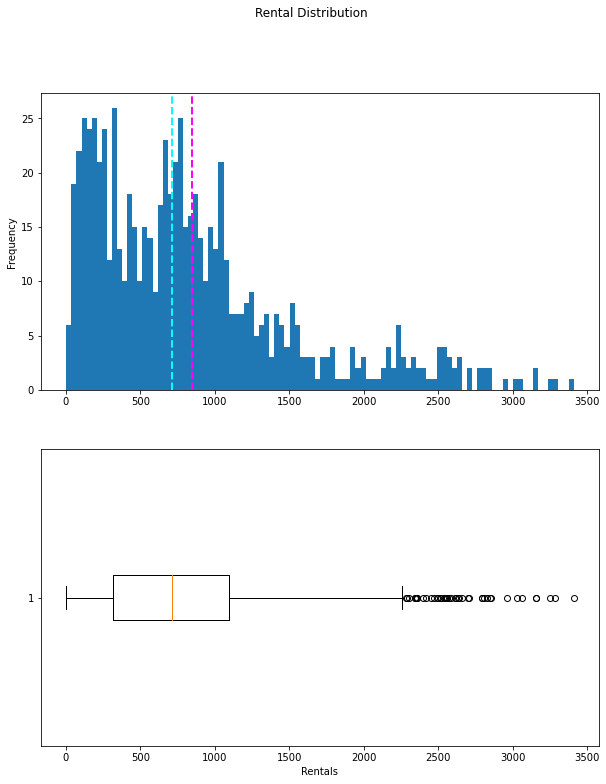

In [27]:
label = bike_data['rentals']
fig, ax = plt.subplots(2, 1, figsize=(10,12))
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution')



# Show the figure


> from the histogram and the box plot we could see that the mean and the midean represented by the dotted line, falls within 500 and 2000.
most of our rentals falls within 0 and a little over 3400 with most of our data between 0 and 2400. from our boxplot we can see same that most of our values fall within 0 and 2400 with the small circles after the line showing outliers meaning these values are above the typical range.
we made histogram and boxplot below to explore further for all our features.

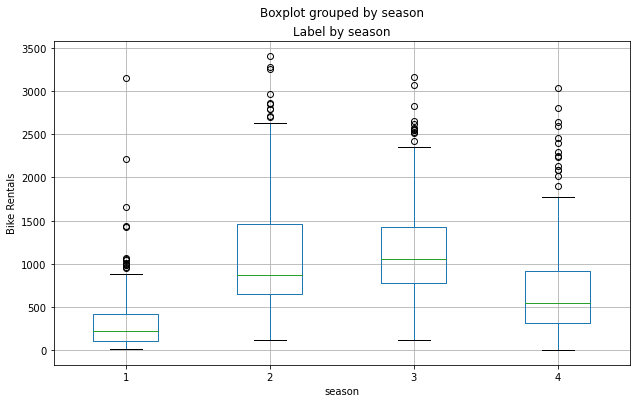

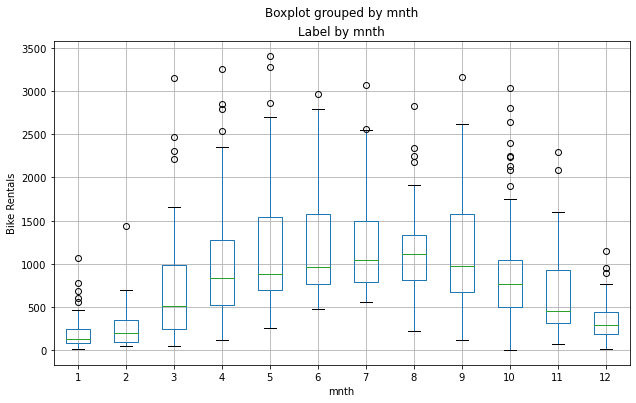

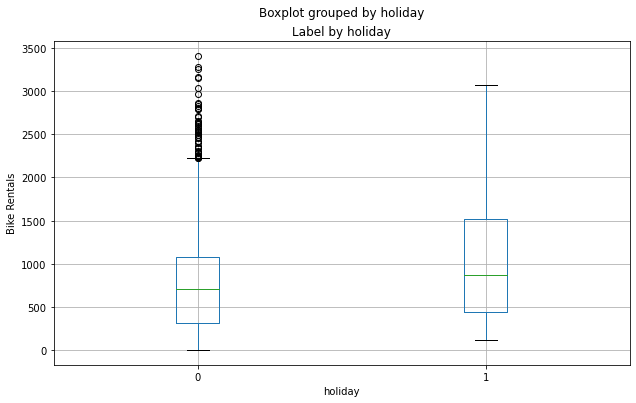

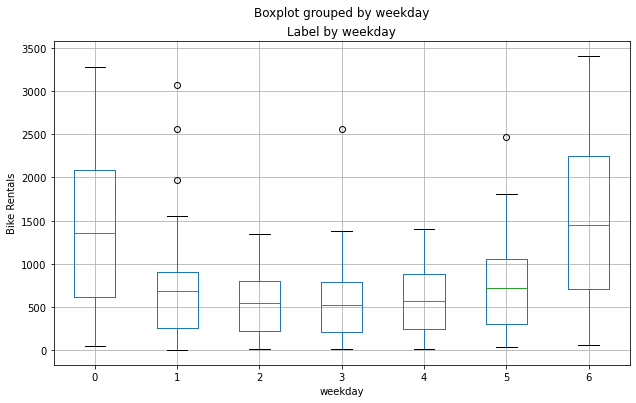

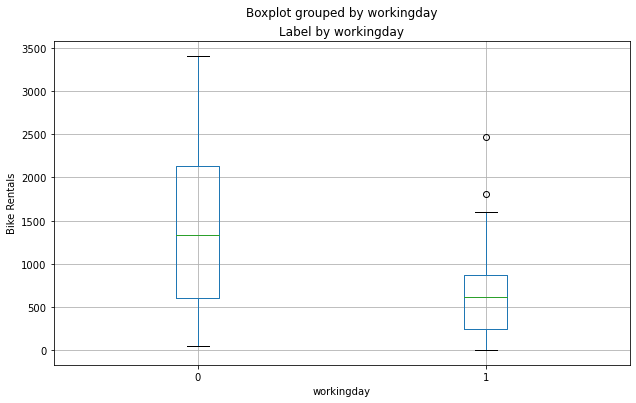

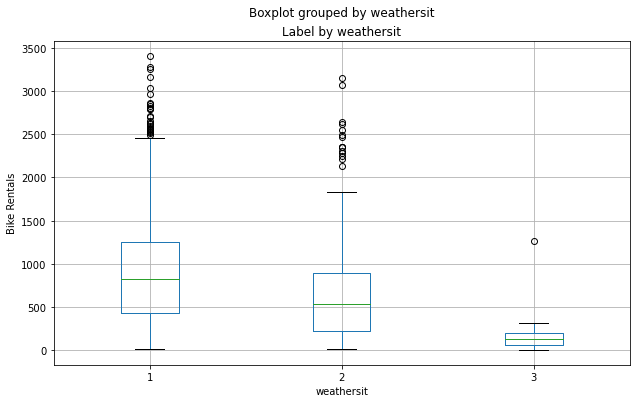

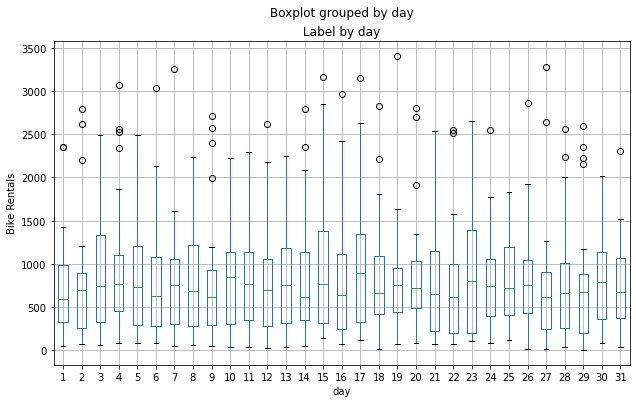

In [33]:
#for our categorical values we will plot a box plot to show each future effect on  the label by the features which is rentals
our_catrgorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
for col in our_catrgorical_features:
    our_count = bike_data[row].value_counts().sort_index()
    fig = plt.figure(figsize=(10,6))
    #we use the gca to get the current axes
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    #we the made a boxplot for the label and the features
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    #we then give each axes a label or names to make the graph more readable
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
    
    
    
    
    
    
    

> from our boxplot we can see our features has almost the same rows except holiday, weathersit and workingday. for instance if we look at the weathersit graph which has cat 1 as clear, cat 2 as mist and cloud, cat 3 as light rain and snow, we can see cat 1 has the most retals followed by cat 2 and cat 3 has the lowest with cat 4 having no renatls at all which is heavy rain or fog.
now we plot scarter plot to find the correlation between our numeric features and our lable below

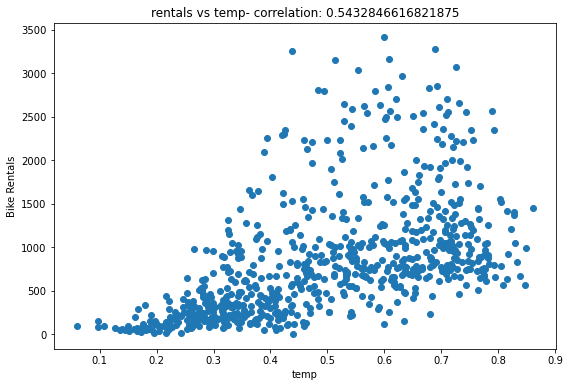

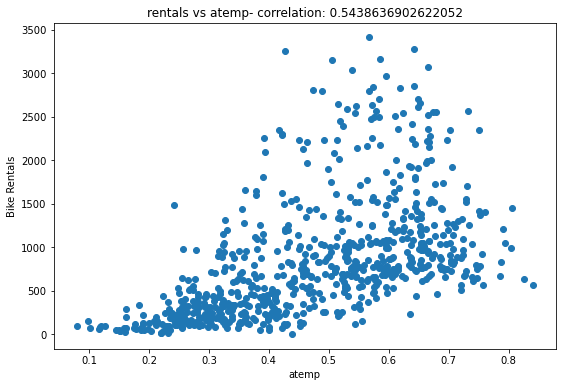

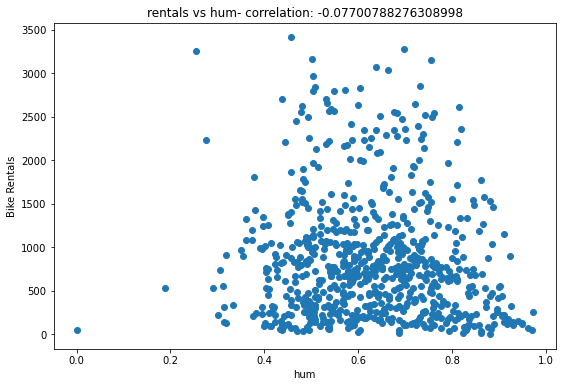

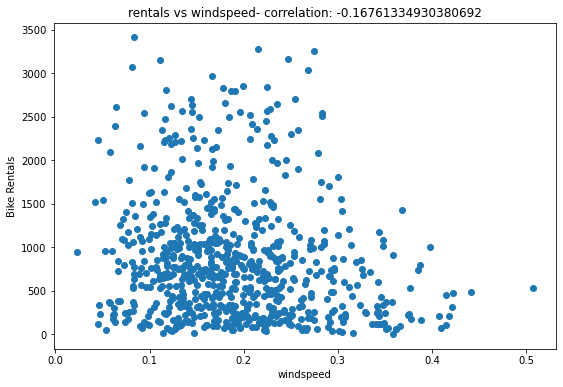

In [38]:

# we droped rentals column  from our features since its our label 
numeric_features.remove('rentals')
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))

> from our scaterplot we ccan see atemp and temp has the most positive correlation with rentals

> after exploring the dataset we were certain take the features that can mostly predict our label(rentals) to train our model

In [39]:
# we then seperated our features into x and y with x containing our features and y containing our labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values,bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

> it is a good practice not to train the model with of our dataset for these reason we splitted the data into two, we used 70% of the data as our training model and 30% as testing model. train_test_split function from sklern library will used to spolit the data

In [40]:
from sklearn.model_selection import train_test_split
#30% of our data for testing i.e 0.30 and the rest for training which is 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


>after splitting the data we then proceeded to train model data below but first of all we need to fit our model

In [42]:
from sklearn.linear_model import LinearRegression
# we Fit our model with  a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


>>> we the proceeded to evaluate our model and make predictions and see how well our model is performing by comparing the predicted values to actual values

In [78]:
import numpy as np
predictions = model.predict(X_test)
#np.set_printoptions is used to determine the way floating point numbers, arrays and other NumPy objects are displayed.
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions))
print('Actual labels   : ' ,y_test)

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.  -42.  -40.
   52. 1014. 1193.  770.  750. 1472.   35.  251. 1218.  787.  304. 1747.
  584. 1745. 1459. 1096. 1605. 1680.  584.  995.  443. 1982.   73. 1127.
 1111. 2347.  401.  330. 1490.  975.  920.  256. 1101.  834.  614. 1302.
  942.  991. 1495. 1135.  539.  741.  938. 1327.  230.  667. 1109.  277.
  713. 1202.  469. 1709.  884.  682.  814.  357. 1795.  360.  523. 1126.
 1096. 1922.  718.  554.  633. 1164.  987.  642. 2243. 1193. 1352. 1044.
 1771.  932. 1224.  708. 1462.  647.  -63.  526. 1296. 1100.  569.  456.
  636. 1206. 1100.  162.  730.  496.  291.  710.  292. 2175.  994.  905.
 1231.   82. 1440.  862.  829. 1109.  638. 1025.  923.  557.  730.  390.
  225. 1106.  617. 1106.  622.  897.   54.  602.  667.  676.  716. 1837.
  -35.  552.  218.  612. 1663.  664.  900. 1788. 1357.  700.  814.  309.
 1740. 1906. 1748.  117.  883.  994. 1622.  403. 1096.  632.  -97. 1892.
  963. 2168.  299.  733. 1160. 1

> comparing the ground truth(actual values) with predicted values as you can see is not the most efficient way as stated by microsoft, so we will proceed to visualize these findings to tell us more about the insights

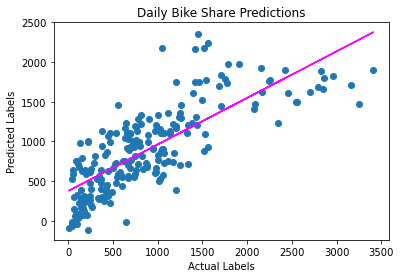

In [79]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# we overlay the regression line to lessen our swaured errors
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')

> as you can see from the scatter plot there is a diagonal trend, i.e the intersection of the predicted and actual values are generally following the path of the trend line but we can also see that the plots are not perfectly fitted along the regresion line these means there are residuals which is the the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label.These residuals when evaluated from the validation data indicate the expected level of error when the model is used with new data for which the label is unknown.
Therefore we used mean squared error fucntion to acertain the difference between the ground truth and the predicted value, root mean squared error fuction to  get an absolute metric in the same unit as the label and a coefficient of determination a relative metric in which the higher the value, the better the fit of the model from 0 to 1, which is 0% to 100% from the sklearn library

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse= np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('r2:', r2)

MSE: 201972.55947035606
RMSE: 449.41357285951665
r2: 0.6040454736919187


So now we've quantified the ability of our model to predict the number of rentals. It definitely has some predictive power, but having our r2 of 60% and some errors, these means there is more room for improvement.

#### WE USED LINEAR REGREESION TO TRAIN OUR MODEL BEFORE, WE THEN TRIED DIFFERENT REGRESSION ALGORITHMS TO TRAIN OUR MODEL

##### LASSO ALGORITHM

MSE: 201155.70593338402
RMSE: 448.5038527519959
r2: 0.605646863782449


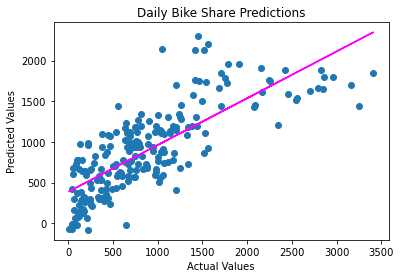

In [81]:
from sklearn.linear_model import Lasso
#we fit our model with laso
model = Lasso().fit(X_train, y_train)
#we then evaluate our model with our test dataset
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse= np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('r2:', r2)

#we then made a scatter plot to visualize the relationship between the ground truth and the prediction values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Daily Bike Share Predictions')
# we overlay the regression line to lessen our swaured errors
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')

> looking at the lasso algorithm it seems not be able to improve our linear model so we tried another algorithm

#### ENSEMBLE ALGORITM

> these model works by providing multiple best estimators to optimize the model

RandomForestRegressor() 

MSE: 107707.18611136363
RMSE: 328.18772998295293
R2: 0.7888468217240138


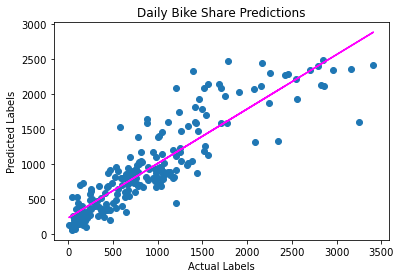

In [92]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')

from the scatterplot above we can see the ensemple has been able  to  mse from lasso model 201155 to 107707, rmse from 448 to 328 and r2 from 60% to 78%

For good measure, let's also try a boosting ensemble algorithm. We'll use a Gradient Boosting estimator, which like a Random Forest algorithm builds multiple trees, but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model.

MSE: 104127.74479556567
RMSE: 322.68830904692794
R2: 0.79586409176486


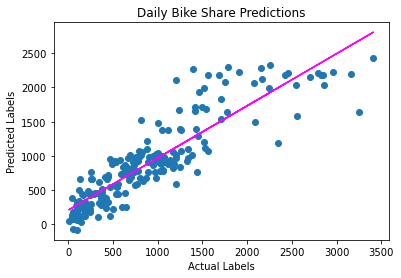

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
#train model
model = GradientBoostingRegressor().fit(X_train, y_train)
# we then Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')

from the scatterplot above we can see the Gradient Boosting estimator  is able to  reduce mse from 104162 to 104127, rmse from  and r2 from 78% to 79%

##### We then optimized our model by using hyperparameters to tune our model, hyperparameter is values that you specify to affect the behavior of a training algorithm are more correctly.

we then tried using a grid search approach to try combinations from a grid of possible values for the learning_rate and n_estimators hyperparameters of the GradientBoostingRegressor estimator.

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }
# We Found the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch= GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
#we then fit our model with the our gridseacrh
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")
# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 



In [97]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 104074.05071107132
RMSE: 322.6051002558257
R2: 0.7959693556474747


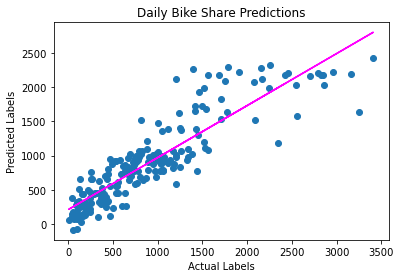

In [98]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')

We can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

In [99]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])
# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


from the above we were able to train the model  including the preprocessing steps. Let's see how it performs with the validation data.

MSE: 105410.21012436064
RMSE: 324.66938587486294
R2: 0.793349898979953


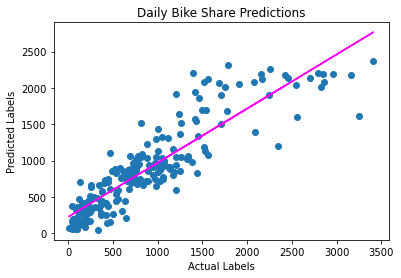

In [100]:
# Get predictions
predictions = model.predict(X_test)


# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')

AND then we used the model to try different values
we first of all have to save the model


In [102]:
import joblib
# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

#now we try our model with different values
# Load the model from the file
loaded_model = joblib.load(filename)
# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 122 rentals
